In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:

# In this CSV file, I have compiled all the factors that hold influence on US house pricing.
# All the data has been collected from publicly available sources

In [3]:
data = pd.read_csv('US_House_Price.csv')

In [4]:
data.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


In [5]:
data.duplicated().any()

False

In [6]:
data.shape

(240, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    240 non-null    object 
 1   building_permits        240 non-null    int64  
 2   const_price_index       240 non-null    float64
 3   delinquency_rate        240 non-null    float64
 4   GDP                     240 non-null    float64
 5   house_for_sale_or_sold  240 non-null    int64  
 6   housing_subsidies       240 non-null    float64
 7   income                  240 non-null    float64
 8   interest_rate           240 non-null    float64
 9   mortgage_rate           240 non-null    float64
 10  construction_unit       240 non-null    int64  
 11  total_houses            240 non-null    float64
 12  total_const_spending    240 non-null    float64
 13  unemployment_rate       240 non-null    float64
 14  urban_population        240 non-null    fl

In [8]:
data.describe()

,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,1309.350000,212.851467,4.876750,18095.159937,55.550000,34.677450,13493.480833,1.301625,4.683308,1201.716667,121344.45000,0.324583,6.012083,81.261200,180.657817
std,479.881055,44.566715,3.305235,2002.293963,25.383865,6.006483,1837.485256,1.578512,1.110667,423.857641,6113.86894,1.950373,2.034118,1.055429,41.255706
min,513.000000,144.400000,1.410000,14614.141000,20.000000,25.930000,10674.000000,0.050000,2.684000,520.000000,111278.00000,-5.900000,3.500000,79.583000,128.461000
25%,979.000000,184.275000,2.087500,16547.088000,36.000000,29.785000,12115.575000,0.120000,3.801375,839.000000,116590.00000,-0.800000,4.575000,80.395750,148.123000
50%,1285.500000,207.450000,3.525000,17576.126000,49.000000,33.544500,12999.350000,0.400000,4.456750,1181.500000,121771.50000,0.800000,5.400000,81.209000,172.496500
75%,1685.000000,224.525000,7.830000,19716.162500,71.000000,37.877250,14820.075000,2.000000,5.752500,1440.000000,126564.50000,1.600000,7.350000,82.107500,197.462000
max,2263.000000,353.015000,11.480000,21989.981000,127.000000,48.021000,20422.600000,5.260000,6.900000,2245.000000,131202.00000,5.000000,14.700000,83.084000,304.755000


In [9]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [10]:
data.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735


In [11]:
data.dtypes

DATE                      datetime64[ns]
building_permits                   int64
const_price_index                float64
delinquency_rate                 float64
GDP                              float64
house_for_sale_or_sold             int64
housing_subsidies                float64
income                           float64
interest_rate                    float64
mortgage_rate                    float64
construction_unit                  int64
total_houses                     float64
total_const_spending             float64
unemployment_rate                float64
urban_population                 float64
home_price_index                 float64
dtype: object

In [12]:
data['Month'] = pd.DatetimeIndex(data['DATE']).month

In [13]:
data.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index,Month
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461,1
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355,2
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148,3
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884,4
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735,5


In [14]:
data['Year'] = pd.DatetimeIndex(data['DATE']).year

In [15]:
data.head()

,DATE,building_permits,const_price_index,delinquency_rate,GDP,house_for_sale_or_sold,housing_subsidies,income,interest_rate,mortgage_rate,construction_unit,total_houses,total_const_spending,unemployment_rate,urban_population,home_price_index,Month,Year
0,2003-01-01,1808,144.4,1.97,14614.141,76,25.93,10710.4,1.24,5.9160,1654,111278.0,1.5,5.8,79.583,128.461,1,2003
1,2003-02-01,1854,145.2,1.97,14614.141,82,25.93,10674.0,1.26,5.8425,1688,111278.0,-0.1,5.9,79.583,129.355,2,2003
2,2003-03-01,1757,145.2,1.97,14614.141,98,25.93,10696.5,1.25,5.7450,1638,111278.0,-1.1,5.9,79.583,130.148,3,2003
3,2003-04-01,1803,145.9,1.83,14743.567,91,25.93,10752.7,1.26,5.8125,1662,111278.0,1.7,6.0,79.583,130.884,4,2003
4,2003-05-01,1835,145.8,1.83,14743.567,101,25.93,10832.0,1.26,5.4840,1733,111278.0,0.2,6.1,79.583,131.735,5,2003


In [16]:
data.columns

Index(['DATE', 'building_permits', 'const_price_index', 'delinquency_rate',
       'GDP', 'house_for_sale_or_sold', 'housing_subsidies', 'income',
       'interest_rate', 'mortgage_rate', 'construction_unit', 'total_houses',
       'total_const_spending', 'unemployment_rate', 'urban_population',
       'home_price_index', 'Month', 'Year'],
      dtype='object')

In [17]:
factors = data.groupby(['Year', 'Month']).sum()[['GDP', 'unemployment_rate', 'mortgage_rate', 'urban_population', 'total_houses']]

In [18]:
factors.reset_index()

,Year,Month,GDP,unemployment_rate,mortgage_rate,urban_population,total_houses
0,2003,1,14614.141,5.8,5.9160,79.583,111278.0
1,2003,2,14614.141,5.9,5.8425,79.583,111278.0
2,2003,3,14614.141,5.9,5.7450,79.583,111278.0
3,2003,4,14743.567,6.0,5.8125,79.583,111278.0
4,2003,5,14743.567,6.1,5.4840,79.583,111278.0
...,...,...,...,...,...,...,...
235,2022,8,21851.134,3.7,5.2225,83.084,131202.0
236,2022,9,21851.134,3.5,6.1120,83.084,131202.0
237,2022,10,21989.981,3.7,6.9000,83.084,131202.0
238,2022,11,21989.981,3.6,6.8050,83.084,131202.0


In [19]:
fc = pd.melt(factors.reset_index(), id_vars = 'Year', value_vars = ['GDP', 'unemployment_rate', 'mortgage_rate', 
    'urban_population', 'total_houses'], var_name = 'Month', value_name = 'values')

In [20]:
fc

,Year,Month,values
0,2003,GDP,14614.141
1,2003,GDP,14614.141
2,2003,GDP,14614.141
3,2003,GDP,14743.567
4,2003,GDP,14743.567
...,...,...,...
1195,2022,total_houses,131202.000
1196,2022,total_houses,131202.000
1197,2022,total_houses,131202.000
1198,2022,total_houses,131202.000


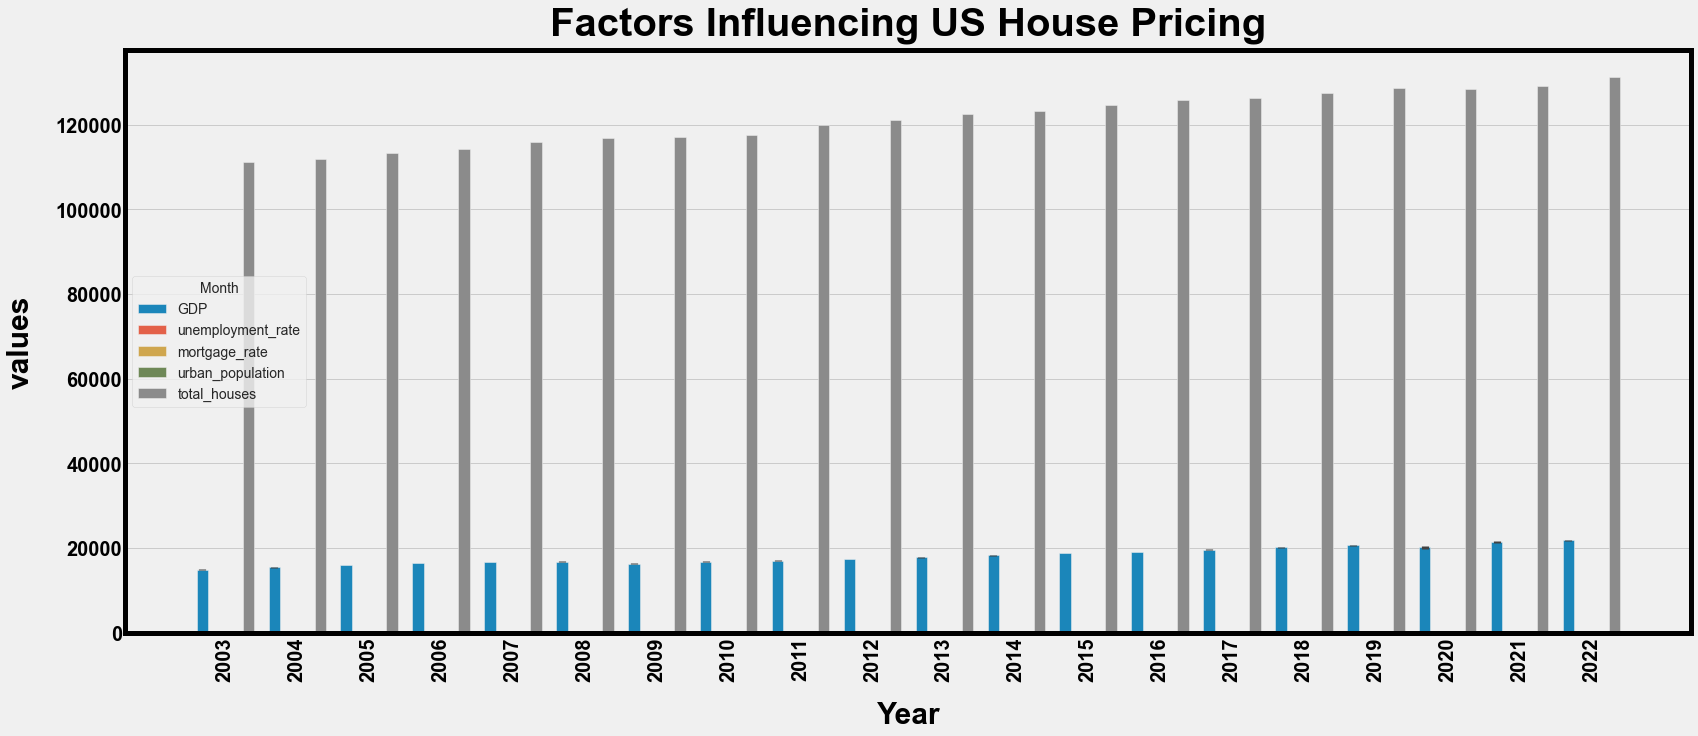

In [21]:
fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x = 'Year', y = 'values', hue = 'Month', data = fc)
plt.xlabel('Year', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.ylabel('values', fontweight = 'bold', fontsize = 30, color = 'k', labelpad = 20)
plt.xticks(fontsize = 20, fontweight = 'bold', rotation = 90, color = 'k')
plt.yticks(fontsize = 20, fontweight = 'bold', color = 'k')
ax.spines['left'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Factors Influencing US House Pricing', fontweight = 'bold', fontsize = 40, color = 'black', pad = 15)
plt.savefig('Factors Influencing US House Pricing.png', transparent = True, bbox_inches = 'tight')

plt.plot()
plt.show()

In [22]:
# According to this analysis, Gross Domestic Products(GDP) and Total Houses increased
# considerably since 2003-2022. This shows House Pricing has been on a positive side.